In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
customers = pd.read_csv('USA_Housing.csv')
customers.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
customers.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [4]:
customers.info()

<class 'pandas.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   str    
dtypes: float64(6), str(1)
memory usage: 499.6 KB


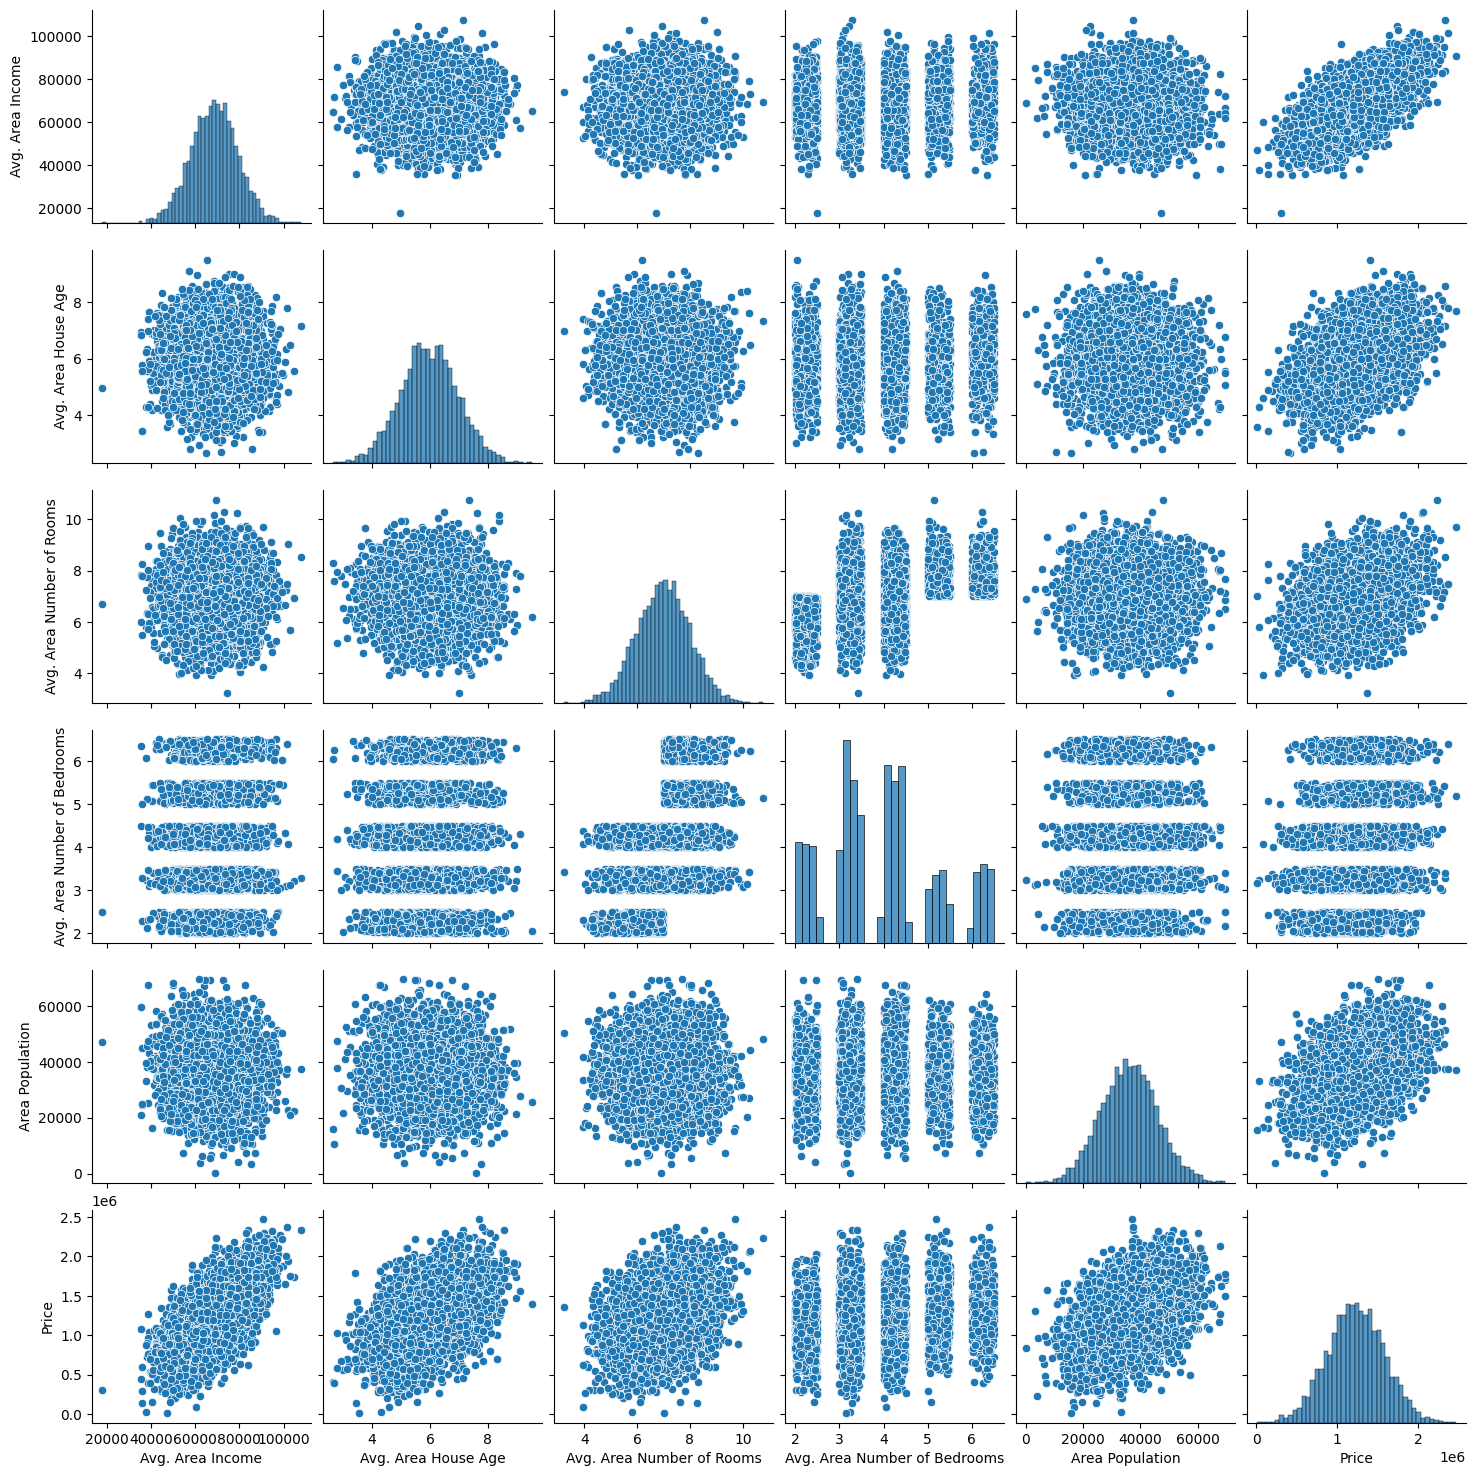

In [5]:
sns.pairplot(customers)

In [6]:
scaler = StandardScaler()

X=customers.drop(['Price','Address'],axis=1)
y=customers['Price']

cols = X.columns

X = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
lr = LinearRegression()
lr.fit(X_train,y_train)

pred = lr.predict(X_test)

r2_score(y_test,pred)

0.9185060945460738

<Axes: xlabel='Price'>

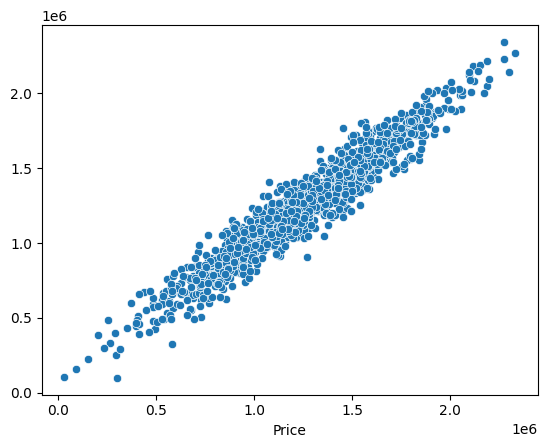

In [11]:
sns.scatterplot(x=y_test, y=pred)

<Axes: xlabel='Price', ylabel='Count'>

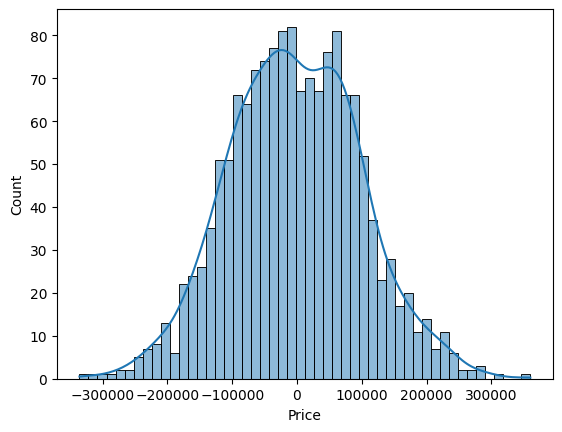

In [12]:
sns.histplot((y_test-pred),bins=50,kde=True)

In [13]:
cdf=pd.DataFrame(lr.coef_, cols, ['coefficients']).sort_values('coefficients',ascending=False)
cdf

,coefficients
Avg. Area Income,230377.522563
Avg. Area House Age,163793.118567
Area Population,151104.850811
Avg. Area Number of Rooms,122101.350267
Avg. Area Number of Bedrooms,1627.317235


In [14]:
# KNN Model Training
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
knn_pred = knn.predict(X_test)

# Evaluate KNN Model
knn_r2 = r2_score(y_test, knn_pred)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_mae = mean_absolute_error(y_test, knn_pred)

print(f"KNN Model Performance:")
print(f"R² Score: {knn_r2:.4f}")
print(f"Mean Squared Error: {knn_mse:.2f}")
print(f"Mean Absolute Error: {knn_mae:.2f}")

KNN Model Performance:
R² Score: 0.8590
Mean Squared Error: 17598307024.28
Mean Absolute Error: 105830.34


In [15]:
# Compare KNN vs Linear Regression
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN (k=5)'],
    'R² Score': [r2_score(y_test, pred), knn_r2],
    'MSE': [mean_squared_error(y_test, pred), knn_mse],
    'MAE': [mean_absolute_error(y_test, pred), knn_mae]
})
comparison_df

,Model,R² Score,MSE,MAE
0,Linear Regression,0.918506,1.016913e+10,81257.557946
1,KNN (k=5),0.858970,1.759831e+10,105830.342831


AttributeError: Rectangle.set() got an unexpected keyword argument 'kde'

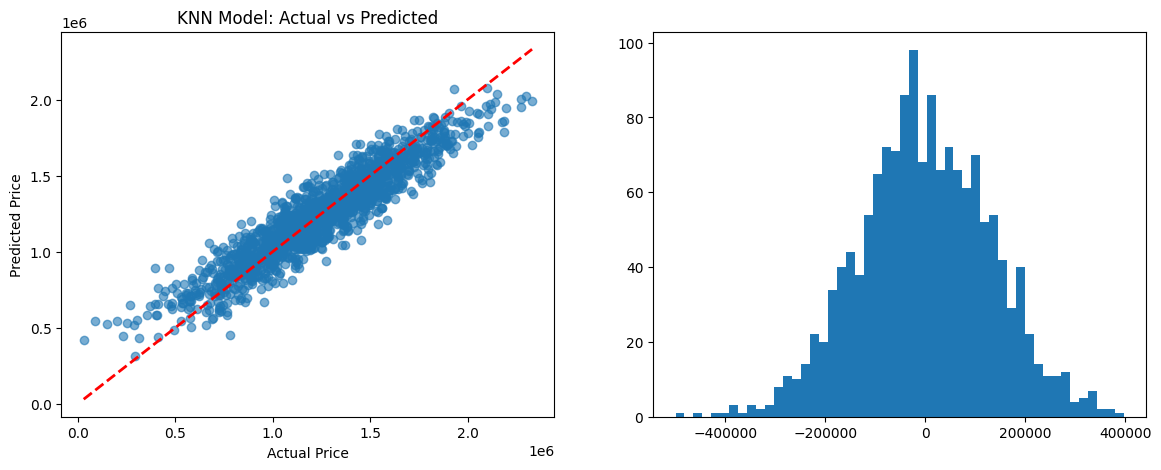

In [ ]:
# KNN Predictions Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot for KNN
axes[0].scatter(y_test, knn_pred, alpha=0.6)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')
axes[0].set_title('KNN Model: Actual vs Predicted')

# Residuals histogram for KNN
axes[1].hist(y_test - knn_pred, bins=50, edgecolor='black', density=True)
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Frequency')
axes[1].set_title('KNN Model: Residuals Distribution')

plt.tight_layout()
plt.show()

In [ ]:
# Find optimal k value using cross-validation
from sklearn.model_selection import cross_val_score

k_values = range(2, 31)
cv_scores = []

for k in k_values:
    knn_cv = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn_cv, X_train, y_train, cv=5, scoring='r2')
    cv_scores.append(scores.mean())

# Plot cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, 'b-o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation R² Score')
plt.title('KNN Performance: Optimal k Value')
plt.grid(True)
plt.show()

# Find best k
best_k = k_values[np.argmax(cv_scores)]
print(f"Optimal k value: {best_k}")
print(f"Best CV R² Score: {max(cv_scores):.4f}")

In [ ]:
# Train final KNN model with optimal k
knn_final = KNeighborsRegressor(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
knn_final_pred = knn_final.predict(X_test)

# Final model performance
print(f"\n=== FINAL KNN MODEL (k={best_k}) ===")
print(f"R² Score: {r2_score(y_test, knn_final_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, knn_final_pred):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, knn_final_pred):.2f}")

print(f"\n=== MODEL COMPARISON ===")
lr_r2 = r2_score(y_test, pred)
knn_final_r2 = r2_score(y_test, knn_final_pred)
print(f"Linear Regression R²: {lr_r2:.4f}")
print(f"KNN (k={best_k}) R²: {knn_final_r2:.4f}")
print(f"Improvement: {(knn_final_r2 - lr_r2):.4f}" if knn_final_r2 > lr_r2 else f"Linear Regression performs better by {abs(knn_final_r2 - lr_r2):.4f}")